In [0]:
import pandas as pd
from google.colab import files
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import re

In [4]:
uploaded = files.upload()

Saving scool_census_dataset.csv to scool_census_dataset.csv


In [0]:
df = pd.read_csv("scool_census_dataset.csv")

In [132]:
df.head()

,Year,Region,Gender,Age,Country,New Zealand European,Maori,Samoan,Cook Islands Maori,Tongan,Niuean,Chinese,Indian,Other ethnicity,Languages spoken,Eye Colour,Handedness,Height,Right foot length,Wrist circumference,Left thumb circumference,Travel method to school,Travel time to school,Bag weight,Litter in lunch,Fruit/vegetables in lunch,Memory time,Reaction time,Time standing on left leg,Physical activity - before school,Physical activity - at school,Physical activity - after school,Physical activity - on the weekend,Scheduled activities in last week,Screen time after school,Favourite video game,Own cell phone,Facebook account,Instagram account,Snapchat account,Reddit account,YouTube channel,Technology - None of these,Check messages as soon as you wake up,Respond to messages immediately,Take phone to school,Lose focus as school due to phone,Feeling without phone - Angry,Feeling without phone - Anxious,Feeling without phone - Frustrated,Feeling without phone - Happy,Feeling without phone - Lonely,Feeling without phone - Relieved,Feeling without phone - Sad,Feeling without phone - Neutral,Screen time opinion - On your phone,Screen time opinion - On social media,Screen time opinion - Playing video games,Bed time,Wake time,Sleep time,Time you get home from school,Time you ate dinner,Climate change opinion,How true: I get carried away by my feelings,How true: I say the first thing that comes into my mind without thinking enough about it,"How true: I can't stop myself from doing something, even if I know it is wrong",How true: I try to talk out a problem instead of fighting,How true: It is easy for me to make friends,How true: I know how to stand up for myself without being mean,How wrong - Drink alcohol,How wrong - Smoke tobacco cigarettes,How wrong - Smoke e-cigarettes,How wrong - Smoke marijuana,How wrong (caregivers/parents) - Drink alcohol,How wrong (caregivers/parents) - Smoke tobacco cigarettes,How wrong (caregivers/parents) - Smoke e-cigarettes,How wrong (caregivers/parents) - Smoke marijuana
0,10,Wellington Region,female,14.0,New Zealand,yes,no,no,no,no,no,no,no,NaN,2.0,blue,right,164.0,25.0,16.0,7.0,walk,3.0,3.0,no,2.0,26.0,0.375,27.0,0,2,3+,1.0,4.5,4.75,Supermarket Tycoon,yes,yes,yes,yes,no,no,no,always,sometimes,always,sometimes,no,yes,no,yes,no,yes,no,no,toomuch,toomuch,aboutright,12:00:00,07:30:00,19.5,15:30:00,20:00:00,urgent,49.0,65.0,20.0,-62.0,30.0,-48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,Bay of Plenty Region,male,16.0,New Zealand,yes,no,no,no,no,no,no,no,NaN,1.0,blue,left,179.0,27.0,18.0,7.0,bus,10.0,1.0,yes,1.0,58.0,0.817,36.0,3+,3+,3+,2.0,18.0,1.00,Don't Have One,yes,no,yes,yes,no,no,no,sometimes,sometimes,always,sometimes,no,no,no,no,no,no,no,yes,aboutright,aboutright,toolittle,22:00:00,06:30:00,8.5,15:30:00,18:00:00,urgent,1.0,NaN,NaN,19.0,-45.0,44.0,-56.0,100.0,100.0,100.0,-56.0,100.0,100.0,100.0
2,7,Auckland Region,female,11.0,New Zealand,no,no,yes,yes,no,no,yes,no,"German, Tokelauan",1.0,brown,right,165.0,24.0,15.0,6.0,walk,15.0,4.0,yes,4.0,57.0,1.603,91.0,3+,3+,3+,1.0,6.5,2.25,Don't Have One,yes,no,no,no,no,no,no,rarely,never,never,sometimes,no,no,no,no,no,no,no,yes,aboutright,aboutright,NaN,21:30:00,07:00:00,9.5,15:30:00,19:30:00,urgent,-56.0,89.0,17.0,1.0,46.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,Waikato Region,female,11.0,New Zealand,yes,yes,no,no,no,no,no,no,NaN,1.0,brown,right,153.0,26.0,16.0,5.0,motor,20.0,2.1,no,2.0,98.0,0.658,49.0,NaN,1,1,2.0,1.0,0.50,NaN,no,no,yes,yes,no,no,no,NaN,NaN,NaN,NaN,no,no,no,no,no,no,no,no,NaN,toomuch,NaN,21:30:00,06:30:00,9.0,16:30:00,18:30:00,future,-80.0,-34.0,-80.0,-71.0,63.0,-33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,Canterbury Region,female,17.0,New Zealand,yes,no,no,no,no,no,no,no,NaN,1.0,brown,right,166.0,26.0,17.0,7.0,walk,1.0,5.3,yes,1.0,51.0,0.478,59.0,1,0,0,0.0,9.0,4.00,Don't Have One,yes,yes,yes,yes,no,no,no,always,often,always,sometimes,no,yes,yes,no,no,no,no,yes,toomuch,toomuch,aboutright,21:00:00,06:30:00,9.5,18:00:00,19:30:00,urgent,31.0,-53.0,-73.

In [133]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 78 columns):
Year                                                                                        1000 non-null int64
Region                                                                                      1000 non-null object
Gender                                                                                      998 non-null object
Age                                                                                         989 non-null float64
Country                                                                                     997 non-null object
New Zealand European                                                                        1000 non-null object
Maori                                                                                       1000 non-null object
Samoan                                                                                      1000 non-null 

In [134]:
df.describe()

,Year,Age,Languages spoken,Height,Right foot length,Wrist circumference,Left thumb circumference,Travel time to school,Bag weight,Fruit/vegetables in lunch,Memory time,Reaction time,Time standing on left leg,Physical activity - on the weekend,Scheduled activities in last week,Screen time after school,Sleep time,How true: I get carried away by my feelings,How true: I say the first thing that comes into my mind without thinking enough about it,"How true: I can't stop myself from doing something, even if I know it is wrong",How true: I try to talk out a problem instead of fighting,How true: It is easy for me to make friends,How true: I know how to stand up for myself without being mean,How wrong - Drink alcohol,How wrong - Smoke tobacco cigarettes,How wrong - Smoke e-cigarettes,How wrong - Smoke marijuana,How wrong (caregivers/parents) - Drink alcohol,How wrong (caregivers/parents) - Smoke tobacco cigarettes,How wrong (caregivers/parents) - Smoke e-cigarettes,How wrong (caregivers/parents) - Smoke marijuana
count,1000.000000,989.000000,951.000000,964.000000,974.000000,876.000000,939.000000,981.000000,899.000000,979.000000,981.000000,971.000000,974.000000,952.000000,964.000000,916.000000,975.000000,934.000000,942.000000,936.000000,939.000000,937.000000,941.000000,99.000000,102.000000,101.000000,99.000000,102.000000,102.000000,102.000000,102.000000
mean,8.210000,12.207280,1.528917,157.300830,23.736140,15.765982,6.067093,17.698267,3.744049,1.753830,53.046891,2.213623,56.804928,1.315126,4.355291,2.894924,9.412821,-8.432548,-9.339703,-32.881410,21.759318,28.390608,25.706695,-12.474747,48.549020,28.405941,40.616162,8.617647,74.166667,66.872549,70.941176
std,1.936918,2.102752,0.782005,14.256833,3.019156,2.002006,1.350501,15.814443,2.431039,1.577472,19.832921,14.090542,75.870576,0.740493,5.208820,2.045239,2.550836,62.025677,62.242108,58.556448,61.865953,59.341877,58.609300,68.138865,63.640486,65.608258,71.198015,74.864901,51.825122,53.821059,56.311162
min,4.000000,6.000000,1.000000,100.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,23.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
25%,7.000000,11.000000,1.000000,148.000000,22.000000,15.000000,6.000000,7.000000,2.000000,1.000000,41.000000,0.457000,17.000000,1.000000,1.000000,1.250000,8.500000,-62.000000,-61.000000,-86.000000,-19.000000,-11.000000,-12.000000,-69.500000,20.500000,-14.000000,-7.000000,-62.750000,79.250000,49.500000,72.500000
50%,8.000000,12.000000,1.000000,159.000000,24.000000,16.000000,6.000000,15.000000,3.400000,2.000000,49.000000,0.518000,32.000000,1.000000,2.750000,2.500000,9.500000,-2.000000,-16.000000,-44.000000,31.000000,39.000000,33.000000,-23.000000,72.000000,41.000000,71.000000,10.500000,100.000000,98.000000,100.000000
75%,9.000000,14.000000,2.000000,167.000000,26.000000,17.000000,7.000000,25.000000,5.000000,3.000000,60.000000,0.663500,62.000000,2.000000,5.812500,4.000000,10.000000,38.000000,38.000000,4.000000,73.500000,78.000000,73.000000,40.500000,100.000000,100.000000,100.000000,88.250000,100.000000,100.000000,100.000000
max,14.000000,25.000000,7.000000,202.000000,33.000000,24.000000,10.000000,120.000000,17.000000,15.000000,273.000000,250.978000,600.000000,2.000000,40.750000,8.750000,22.500000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [135]:
df.columns[df.isnull().any()]

Index(['Gender', 'Age', 'Country', 'Other ethnicity', 'Languages spoken',
       'Handedness', 'Height', 'Right foot length', 'Wrist circumference',
       'Left thumb circumference', 'Travel method to school',
       'Travel time to school', 'Bag weight', 'Litter in lunch',
       'Fruit/vegetables in lunch', 'Memory time', 'Reaction time',
       'Time standing on left leg', 'Physical activity - before school',
       'Physical activity - at school', 'Physical activity - after school',
       'Physical activity - on the weekend',
       'Scheduled activities in last week', 'Screen time after school',
       'Favourite video game', 'Own cell phone', 'Facebook account',
       'Instagram account', 'Snapchat account', 'Reddit account',
       'YouTube channel', 'Technology - None of these',
       'Check messages as soon as you wake up',
       'Respond to messages immediately', 'Take phone to school',
       'Lose focus as school due to phone', 'Feeling without phone - Angry',
       '

In [136]:
df.shape

(1000, 78)

In [137]:
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace = True)
print(miss)

Gender                                                       0.002
Country                                                      0.003
Handedness                                                   0.006
Travel method to school                                      0.008
Age                                                          0.011
                                                             ...  
How wrong (caregivers/parents) - Smoke tobacco cigarettes    0.898
How wrong (caregivers/parents) - Smoke marijuana             0.898
How wrong - Smoke e-cigarettes                               0.899
How wrong - Drink alcohol                                    0.901
How wrong - Smoke marijuana                                  0.901
Length: 67, dtype: float64


In [0]:
miss = miss.to_frame()
miss.columns = ['Count']
miss.index.names = ['Columns']
miss['Columns'] = miss.index

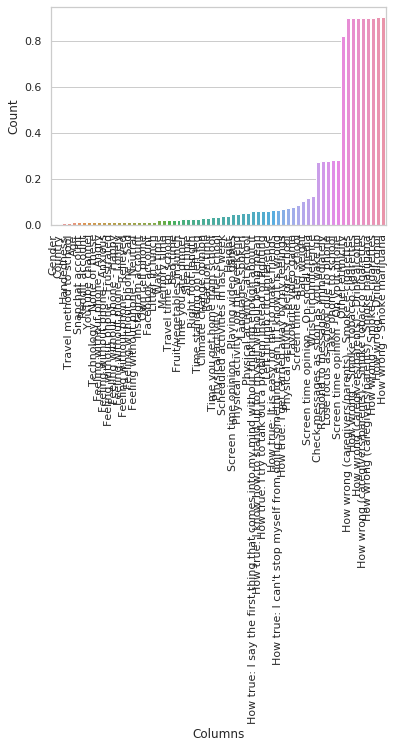

In [139]:
sns.set(style='whitegrid',  color_codes = True)
sns.barplot(x = 'Columns', y = 'Count', data = miss)
plt.xticks(rotation = 90)
plt.show()

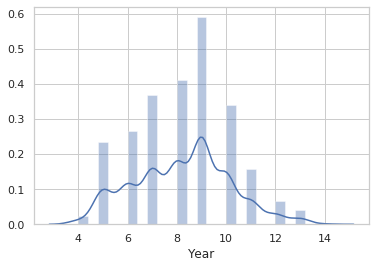

In [140]:
sns.distplot(df['Year'])

In [0]:
numeric_data = df.select_dtypes(include = [np.number])
cat_data = df.select_dtypes(exclude = [np.number])

In [142]:
numeric_data.head()

,Year,Age,Languages spoken,Height,Right foot length,Wrist circumference,Left thumb circumference,Travel time to school,Bag weight,Fruit/vegetables in lunch,Memory time,Reaction time,Time standing on left leg,Physical activity - on the weekend,Scheduled activities in last week,Screen time after school,Sleep time,How true: I get carried away by my feelings,How true: I say the first thing that comes into my mind without thinking enough about it,"How true: I can't stop myself from doing something, even if I know it is wrong",How true: I try to talk out a problem instead of fighting,How true: It is easy for me to make friends,How true: I know how to stand up for myself without being mean,How wrong - Drink alcohol,How wrong - Smoke tobacco cigarettes,How wrong - Smoke e-cigarettes,How wrong - Smoke marijuana,How wrong (caregivers/parents) - Drink alcohol,How wrong (caregivers/parents) - Smoke tobacco cigarettes,How wrong (caregivers/parents) - Smoke e-cigarettes,How wrong (caregivers/parents) - Smoke marijuana
0,10,14.0,2.0,164.0,25.0,16.0,7.0,3.0,3.0,2.0,26.0,0.375,27.0,1.0,4.5,4.75,19.5,49.0,65.0,20.0,-62.0,30.0,-48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,16.0,1.0,179.0,27.0,18.0,7.0,10.0,1.0,1.0,58.0,0.817,36.0,2.0,18.0,1.00,8.5,1.0,NaN,NaN,19.0,-45.0,44.0,-56.0,100.0,100.0,100.0,-56.0,100.0,100.0,100.0
2,7,11.0,1.0,165.0,24.0,15.0,6.0,15.0,4.0,4.0,57.0,1.603,91.0,1.0,6.5,2.25,9.5,-56.0,89.0,17.0,1.0,46.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,11.0,1.0,153.0,26.0,16.0,5.0,20.0,2.1,2.0,98.0,0.658,49.0,2.0,1.0,0.50,9.0,-80.0,-34.0,-80.0,-71.0,63.0,-33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,17.0,1.0,166.0,26.0,17.0,7.0,1.0,5.3,1.0,51.0,0.478,59.0,0.0,9.0,4.00,9.5,31.0,-53.0,-73.0,-35.0,-24.0,-35.0,-53.0,59.0,60.0,84.0,-37.0,80.0,80.0,88.0


In [143]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
Year                                                                                        1000 non-null int64
Age                                                                                         989 non-null float64
Languages spoken                                                                            951 non-null float64
Height                                                                                      964 non-null float64
Right foot length                                                                           974 non-null float64
Wrist circumference                                                                         876 non-null float64
Left thumb circumference                                                                    939 non-null float64
Travel time to school                                                                       981 non-null

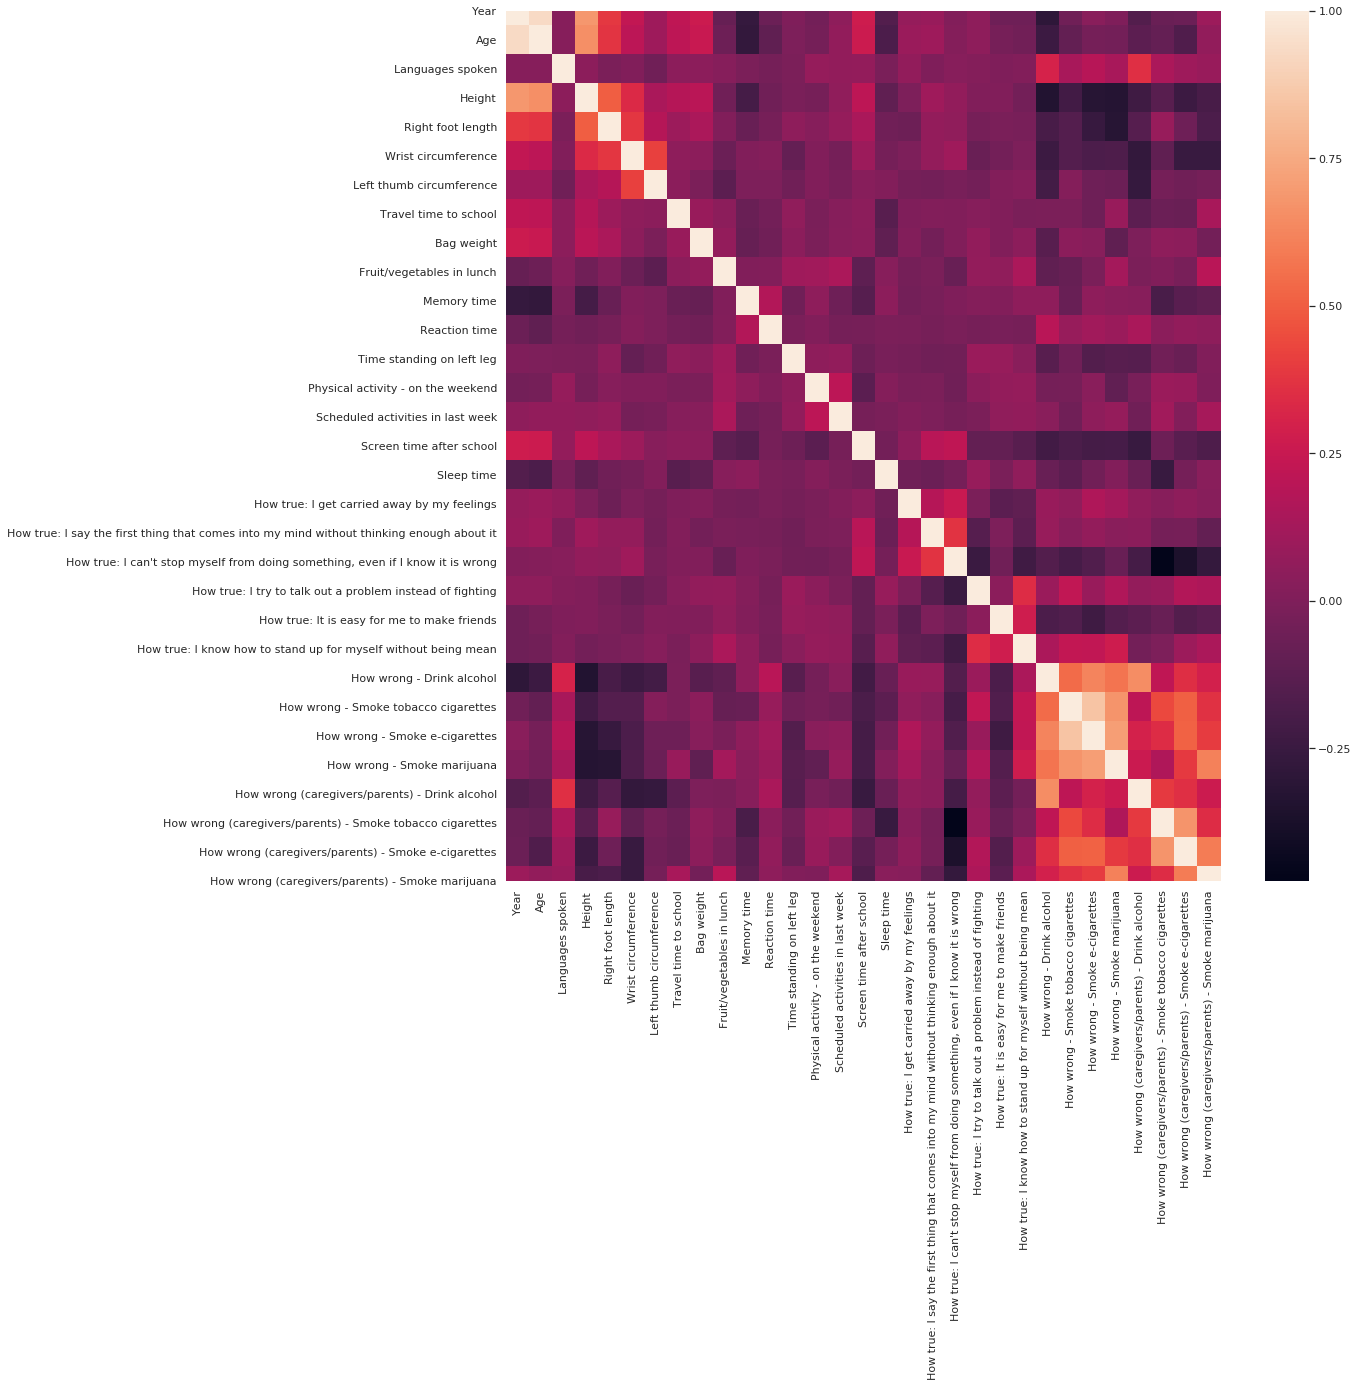

In [144]:
corr = numeric_data.corr()
plt.figure(figsize = (16,16))
sns.heatmap(corr)

In [145]:
numeric_data['Year'].corr(numeric_data['Age'])

0.9316055063523141

In [146]:
print('Unique Values : ', numeric_data['Age'].unique(),'\n')
print('Sum of Null Count :', numeric_data['Age'].isnull().sum())

Unique Values :  [14. 16. 11. 17. 13. 15. 12.  8. 10.  9. 18. nan  6. 19.  7. 25.] 

Sum of Null Count : 11


As last 8 columns have 90% missing value, so leaving them

In [0]:
updated_numeric_data = numeric_data.iloc[:,:23]

Selecting all the required columns to get the mean

In [0]:
positive_numeric_column = updated_numeric_data.iloc[:,1:-6]

Function is been defined to get the mean value for all the null value columns

NOTE: using this functions for columns having positive values

In [0]:
def fill_miss_value(col):
  col.fillna(col.mean(), inplace=True)
  return col

In [150]:
fill_miss_value(positive_numeric_column)
positive_numeric_column.head()

,Age,Languages spoken,Height,Right foot length,Wrist circumference,Left thumb circumference,Travel time to school,Bag weight,Fruit/vegetables in lunch,Memory time,Reaction time,Time standing on left leg,Physical activity - on the weekend,Scheduled activities in last week,Screen time after school,Sleep time
0,14.0,2.0,164.0,25.0,16.0,7.0,3.0,3.0,2.0,26.0,0.375,27.0,1.0,4.5,4.75,19.5
1,16.0,1.0,179.0,27.0,18.0,7.0,10.0,1.0,1.0,58.0,0.817,36.0,2.0,18.0,1.00,8.5
2,11.0,1.0,165.0,24.0,15.0,6.0,15.0,4.0,4.0,57.0,1.603,91.0,1.0,6.5,2.25,9.5
3,11.0,1.0,153.0,26.0,16.0,5.0,20.0,2.1,2.0,98.0,0.658,49.0,2.0,1.0,0.50,9.0
4,17.0,1.0,166.0,26.0,17.0,7.0,1.0,5.3,1.0,51.0,0.478,59.0,0.0,9.0,4.00,9.5


In [0]:
negative_numeric_column = updated_numeric_data.iloc[:,-6:]

Function is been defined to fill null value of -ve value columns


In [0]:
def fill_statement_miss_val(col):
  col.fillna('0', inplace=True)
  return col

In [153]:
fill_statement_miss_val(negative_numeric_column)
negative_numeric_column.head()

,How true: I get carried away by my feelings,How true: I say the first thing that comes into my mind without thinking enough about it,"How true: I can't stop myself from doing something, even if I know it is wrong",How true: I try to talk out a problem instead of fighting,How true: It is easy for me to make friends,How true: I know how to stand up for myself without being mean
0,49,65,20,-62,30,-48
1,1,0,0,19,-45,44
2,-56,89,17,1,46,100
3,-80,-34,-80,-71,63,-33
4,31,-53,-73,-35,-24,-35


In [154]:
cat_data.head()

,Region,Gender,Country,New Zealand European,Maori,Samoan,Cook Islands Maori,Tongan,Niuean,Chinese,Indian,Other ethnicity,Eye Colour,Handedness,Travel method to school,Litter in lunch,Physical activity - before school,Physical activity - at school,Physical activity - after school,Favourite video game,Own cell phone,Facebook account,Instagram account,Snapchat account,Reddit account,YouTube channel,Technology - None of these,Check messages as soon as you wake up,Respond to messages immediately,Take phone to school,Lose focus as school due to phone,Feeling without phone - Angry,Feeling without phone - Anxious,Feeling without phone - Frustrated,Feeling without phone - Happy,Feeling without phone - Lonely,Feeling without phone - Relieved,Feeling without phone - Sad,Feeling without phone - Neutral,Screen time opinion - On your phone,Screen time opinion - On social media,Screen time opinion - Playing video games,Bed time,Wake time,Time you get home from school,Time you ate dinner,Climate change opinion
0,Wellington Region,female,New Zealand,yes,no,no,no,no,no,no,no,NaN,blue,right,walk,no,0,2,3+,Supermarket Tycoon,yes,yes,yes,yes,no,no,no,always,sometimes,always,sometimes,no,yes,no,yes,no,yes,no,no,toomuch,toomuch,aboutright,12:00:00,07:30:00,15:30:00,20:00:00,urgent
1,Bay of Plenty Region,male,New Zealand,yes,no,no,no,no,no,no,no,NaN,blue,left,bus,yes,3+,3+,3+,Don't Have One,yes,no,yes,yes,no,no,no,sometimes,sometimes,always,sometimes,no,no,no,no,no,no,no,yes,aboutright,aboutright,toolittle,22:00:00,06:30:00,15:30:00,18:00:00,urgent
2,Auckland Region,female,New Zealand,no,no,yes,yes,no,no,yes,no,"German, Tokelauan",brown,right,walk,yes,3+,3+,3+,Don't Have One,yes,no,no,no,no,no,no,rarely,never,never,sometimes,no,no,no,no,no,no,no,yes,aboutright,aboutright,NaN,21:30:00,07:00:00,15:30:00,19:30:00,urgent
3,Waikato Region,female,New Zealand,yes,yes,no,no,no,no,no,no,NaN,brown,right,motor,no,NaN,1,1,NaN,no,no,yes,yes,no,no,no,NaN,NaN,NaN,NaN,no,no,no,no,no,no,no,no,NaN,toomuch,NaN,21:30:00,06:30:00,16:30:00,18:30:00,future
4,Canterbury Region,female,New Zealand,yes,no,no,no,no,no,no,no,NaN,brown,right,walk,yes,1,0,0,Don't Have One,yes,yes,yes,yes,no,no,no,always,often,always,sometimes,no,yes,yes,no,no,no,no,yes,toomuch,toomuch,aboutright,21:00:00,06:30:00,18:00:00,19:30:00,urgent


In [155]:
cat_data.describe()

,Region,Gender,Country,New Zealand European,Maori,Samoan,Cook Islands Maori,Tongan,Niuean,Chinese,Indian,Other ethnicity,Eye Colour,Handedness,Travel method to school,Litter in lunch,Physical activity - before school,Physical activity - at school,Physical activity - after school,Favourite video game,Own cell phone,Facebook account,Instagram account,Snapchat account,Reddit account,YouTube channel,Technology - None of these,Check messages as soon as you wake up,Respond to messages immediately,Take phone to school,Lose focus as school due to phone,Feeling without phone - Angry,Feeling without phone - Anxious,Feeling without phone - Frustrated,Feeling without phone - Happy,Feeling without phone - Lonely,Feeling without phone - Relieved,Feeling without phone - Sad,Feeling without phone - Neutral,Screen time opinion - On your phone,Screen time opinion - On social media,Screen time opinion - Playing video games,Bed time,Wake time,Time you get home from school,Time you ate dinner,Climate change opinion
count,1000,998,997,1000,1000,1000,1000,1000,1000,1000,1000,180,1000,994,992,987,930,948,967,923,987,987,987,987,987,987,987,729,725,721,725,987,987,987,987,987,987,987,987,721,886,953,980,981,969,977,972
unique,17,2,41,2,2,2,2,2,2,2,2,81,5,3,7,3,4,4,4,169,2,2,2,2,2,2,2,5,5,5,5,2,2,2,2,2,2,2,2,3,3,3,32,27,26,26,4
top,Auckland Region,female,New Zealand,yes,no,no,no,no,no,no,no,Filipino,brown,right,motor,yes,0,3+,3+,Don't Have One,yes,no,yes,no,no,no,no,always,sometimes,always,never,no,no,no,no,no,no,no,no,aboutright,aboutright,aboutright,21:30:00,07:00:00,15:30:00,18:30:00,urgent
freq,386,560,816,679,820,948,977,972,989,937,960,17,438,828,406,650,428,404,493,362,730,676,549,532,906,824,812,194,273,438,393,896,893,840,879,877,915,867,598,390,381,404,191,299,402,242,508


In [156]:
physical_activity_col = cat_data.iloc[:,16:19]

physical_activity_col['Physical activity - before school'] = physical_activity_col['Physical activity - before school'].str.extract(r'^(\d+)', expand=False)
physical_activity_col['Physical activity - at school'] = physical_activity_col['Physical activity - at school'].str.extract(r'^(\d+)', expand=False)
physical_activity_col['Physical activity - after school'] = physical_activity_col['Physical activity - after school'].str.extract(r'^(\d+)', expand=False)

physical_activity_col['Physical activity - before school'].fillna('0', inplace=True)
physical_activity_col['Physical activity - at school'].fillna('0', inplace=True)
physical_activity_col['Physical activity - after school'].fillna('0', inplace=True)

physical_activity_col.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,Physical activity - before school,Physical activity - at school,Physical activity - after school
0,0,2,3
1,3,3,3
2,3,3,3
3,0,1,1
4,1,0,0


In [157]:
cat_data['New Zealand European'] = cat_data['New Zealand European'].map({'no':0,'yes':1}).astype(np.int)
cat_data['Maori'] = cat_data['Maori'].map({'no':0,'yes':1}).astype(np.int)
cat_data['Samoan'] = cat_data['Samoan'].map({'no':0,'yes':1}).astype(np.int)
cat_data['Cook Islands Maori'] = cat_data['Cook Islands Maori'].map({'no':0,'yes':1}).astype(np.int)
cat_data['Tongan'] = cat_data['Tongan'].map({'no':0,'yes':1}).astype(np.int)
cat_data['Niuean'] = cat_data['Niuean'].map({'no':0,'yes':1}).astype(np.int)
cat_data['Chinese'] = cat_data['Chinese'].map({'no':0,'yes':1}).astype(np.int)
cat_data['Indian'] = cat_data['Indian'].map({'no':0,'yes':1}).astype(np.int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

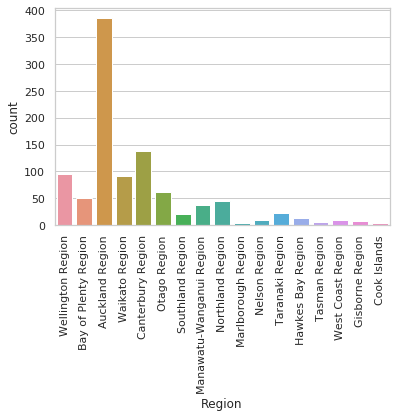

In [158]:
sns.countplot(cat_data['Region'], data=cat_data)
plt.xticks(rotation = 90)

In [159]:
cat_data['Region'] = pd.factorize(cat_data['Region'])[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['female', 'male', nan], dtype=object)

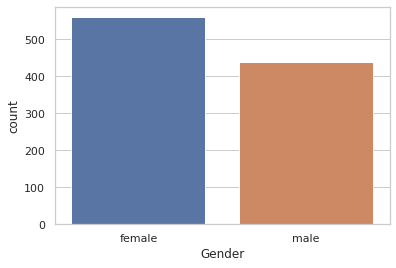

In [160]:
sns.countplot(cat_data['Gender'], data=cat_data)
cat_data['Gender'].unique()

In [161]:
cat_data['Gender'].fillna('female', inplace= True)
cat_data['Gender'] = cat_data['Gender'].map({'female':0,'male':1}).astype(np.int)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

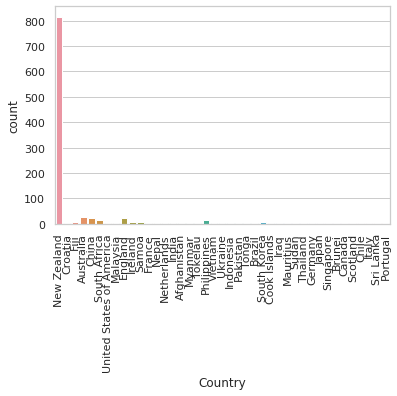

In [162]:
sns.countplot(cat_data['Country'], data=cat_data)
plt.xticks(rotation = 90)

In [163]:
cat_data[cat_data['Country'].isnull()].index.tolist()

[105, 671, 930]

In [164]:
print(cat_data['Indian'].loc[671])
print(cat_data['New Zealand European'].loc[930])
cat_data['Country'][930] = 'New Zealand'
cat_data['Country'][671] = 'India'
#randomely fittin row 105 with New Zealand
cat_data['Country'][105] = 'New Zealand'

1
1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [165]:
cat_data['Country'] = pd.factorize(cat_data['Country'])[0]
cat_data['Eye Colour'] = pd.factorize(cat_data['Eye Colour'])[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


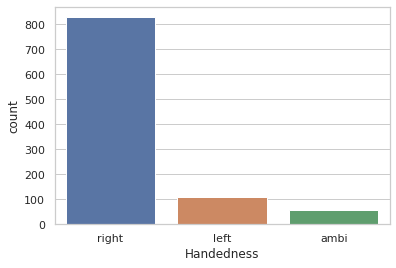

In [166]:
sns.countplot(cat_data['Handedness'], data=cat_data)

In [167]:
cat_data['Handedness'].fillna('right', inplace= True)
cat_data['Handedness'] = cat_data['Handedness'].map({'right':0,'left':1,'ambi':2}).astype(np.int)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


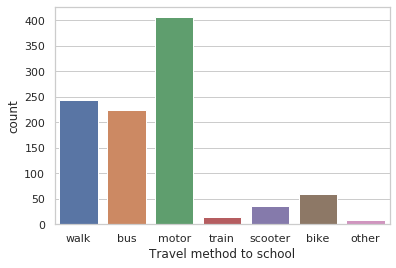

In [168]:
sns.countplot(cat_data['Travel method to school'], data=cat_data)

In [169]:
cat_data['Travel method to school'].fillna('other', inplace= True)
cat_data['Travel method to school']= pd.factorize(cat_data['Travel method to school'])[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['no', 'yes', 'nolunch', nan], dtype=object)

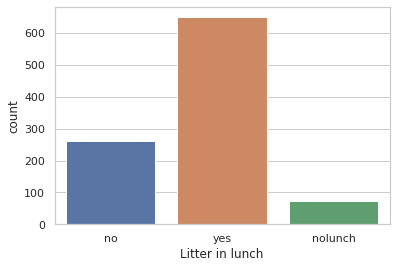

In [170]:
sns.countplot(cat_data['Litter in lunch'], data=cat_data)
cat_data['Litter in lunch'].unique()

In [171]:
cat_data['Litter in lunch'].fillna('yes', inplace= True)
cat_data['Litter in lunch']= pd.factorize(cat_data['Litter in lunch'])[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['yes', 'no', nan], dtype=object)

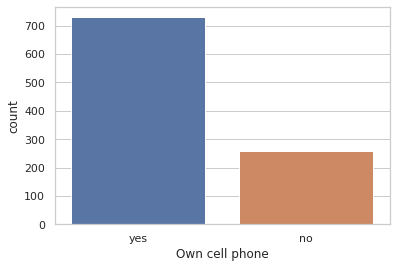

In [172]:
sns.countplot(cat_data['Own cell phone'], data=cat_data)
cat_data['Own cell phone'].unique()

In [173]:
cat_data['Own cell phone'].fillna('yes', inplace= True)
cat_data['Own cell phone']= cat_data['Own cell phone'].map({'no':0,'yes':1}).astype(np.int)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


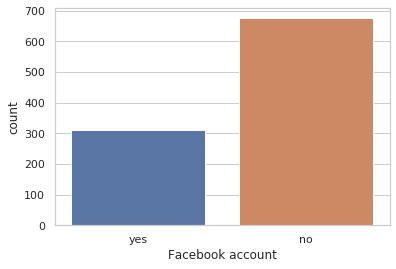

In [174]:
sns.countplot(cat_data['Facebook account'], data=cat_data)
cat_data['Facebook account'].fillna('no', inplace= True)
cat_data['Facebook account']= cat_data['Facebook account'].map({'no':0,'yes':1}).astype(np.int)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


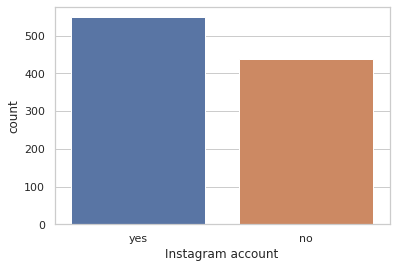

In [175]:
sns.countplot(cat_data['Instagram account'], data=cat_data)
cat_data['Instagram account'].fillna('yes', inplace= True)
cat_data['Instagram account']= cat_data['Instagram account'].map({'no':0,'yes':1}).astype(np.int)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


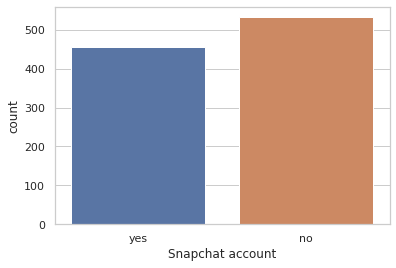

In [176]:
sns.countplot(cat_data['Snapchat account'], data=cat_data)
cat_data['Snapchat account'].fillna('no', inplace= True)
cat_data['Snapchat account']= cat_data['Snapchat account'].map({'no':0,'yes':1}).astype(np.int)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


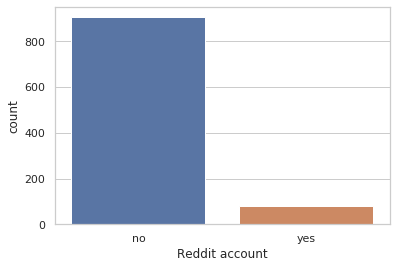

In [177]:
sns.countplot(cat_data['Reddit account'], data=cat_data)
cat_data['Reddit account'].fillna('no', inplace= True)
cat_data['Reddit account']= cat_data['Reddit account'].map({'no':0,'yes':1}).astype(np.int)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


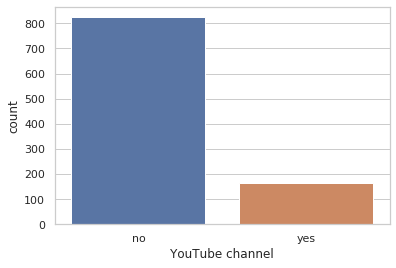

In [178]:
sns.countplot(cat_data['YouTube channel'], data=cat_data)
cat_data['YouTube channel'].fillna('no', inplace= True)
cat_data['YouTube channel']= cat_data['YouTube channel'].map({'no':0,'yes':1}).astype(np.int)

In [179]:
new_cat_data = cat_data.iloc[:,:26]
new_cat_data = new_cat_data.drop(columns=['Other ethnicity','Favourite video game'])
new_cat_data.head()

,Region,Gender,Country,New Zealand European,Maori,Samoan,Cook Islands Maori,Tongan,Niuean,Chinese,Indian,Eye Colour,Handedness,Travel method to school,Litter in lunch,Physical activity - before school,Physical activity - at school,Physical activity - after school,Own cell phone,Facebook account,Instagram account,Snapchat account,Reddit account,YouTube channel
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3,1,1,1,1,0,0
1,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,3,3,3,1,0,1,1,0,0
2,2,0,0,0,0,1,1,0,0,1,0,1,0,0,1,3,3,3,1,0,0,0,0,0
3,3,0,0,1,1,0,0,0,0,0,0,1,0,2,0,0,1,1,0,0,1,1,0,0
4,4,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0
